In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy
import csv

In [2]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

## Plot Confusion Matrix
---

In [15]:
def read_tracking_result(t):
    res = {}

    # Read the CSV file
    with open('output.csv', mode='r') as file:
        reader = csv.reader(file)
        
        keys = next(reader)
        
        for row in reader:
            res[float(row[0])] = {}
            for i, key in enumerate(keys[1:]):
                res[float(row[0])][key] = row[1+i]
                
    if t in res.keys():
        return res[t]
    else:
        return 'no such tracking length'
        
# read_tracking_result(t=0.2)

In [29]:
def get_confusion_matrix(data):
    
    res = [[0,0],[0,0]]
    res[0][0] = int(data['change'].split('/')[0])
    res[1][0] = int(data['change'].split('/')[1])-int(data['change'].split('/')[0])
    res[0][1] = int(data['no_change'].split('/')[1])-int(data['no_change'].split('/')[0])
    res[1][1] = int(data['no_change'].split('/')[0])
    
    return res
    
# get_confusion_matrix(read_tracking_result(t=1))
    

Accuracy  = 76.0 %
Precision = 84.6 %
Recall    = 52.4 %
F1Score   = 64.7 %
TNR    = 93.1 %


/tmp/ipykernel_1459/4193857039.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes1, fontsize=16)
/tmp/ipykernel_1459/4193857039.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes2, fontsize=16)


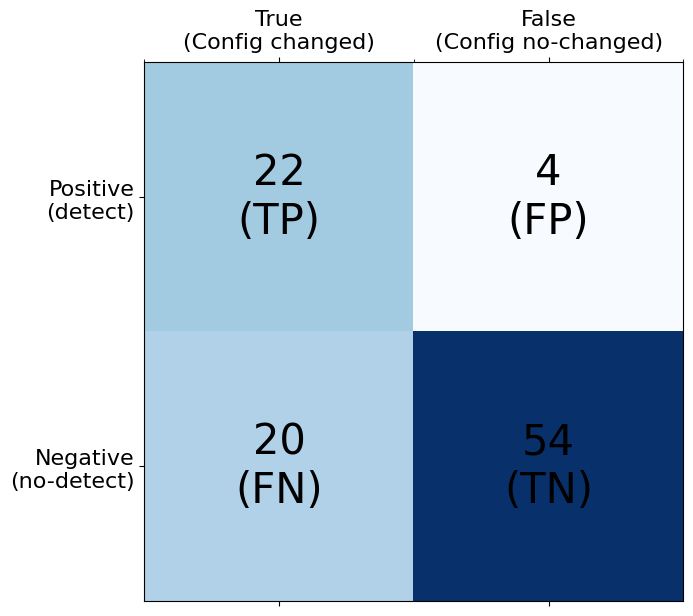

Accuracy  = 96.0 %
Precision = 97.5 %
Recall    = 92.9 %
F1Score   = 95.1 %
TNR    = 98.3 %


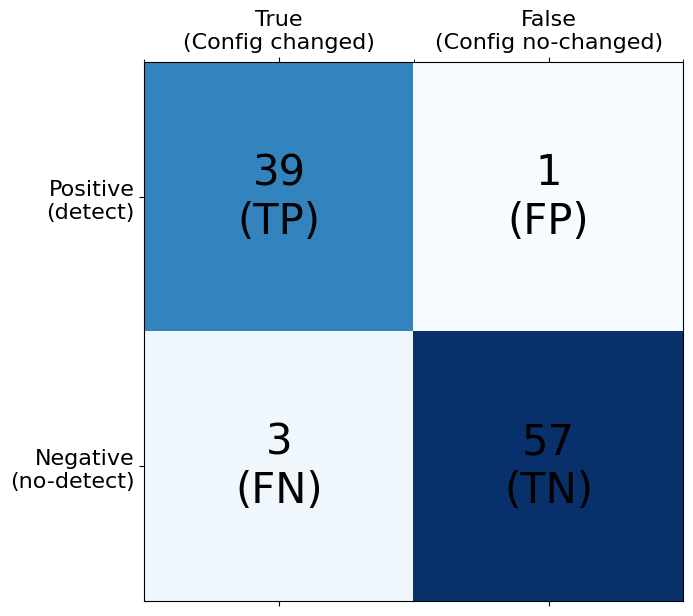

Accuracy  = 97.0 %
Precision = 97.6 %
Recall    = 95.2 %
F1Score   = 96.4 %
TNR    = 98.3 %


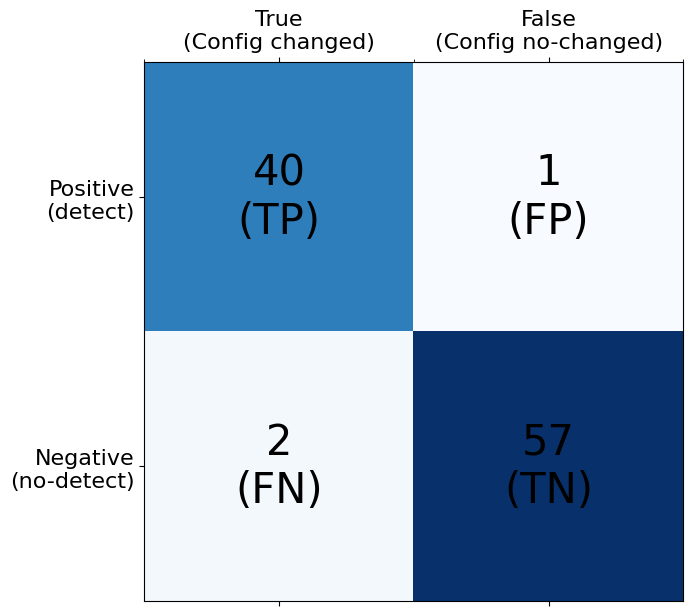

In [18]:
def plot_confusion_matrix(cm, type):
    # Confusion matrix values
    # cm = np.array([[50, 10], 
    #                [5, 35]])
    
    acc = round((cm[0][0] + cm[1][1])*100 / (sum(cm[0])+sum(cm[1])), 1)
    pre = round((cm[0][0])* 100 / (sum(cm[0]) ), 1)
    recall = round((cm[0][0])* 100 / (cm[0][0] + cm[1][0]), 1)
    f1score = round(2*(pre*recall) / (pre + recall), 1)
    tnr = round((cm[1][1])* 100 / (cm[0][1] + cm[1][1]), 1)
    
    print(f'Accuracy  = {acc} %')
    print(f'Precision = {pre} %')
    print(f'Recall    = {recall} %')
    print(f'F1Score   = {f1score} %')
    print(f'TNR    = {tnr} %')

    # Class labels
    classes1 = [f'True\n({type} changed)', f'False\n({type} no-changed)']
    classes2 = ['Positive\n(detect)', 'Negative\n(no-detect)']

    # Create the plot
    fig, ax = plt.subplots(figsize=(7,7))
    cax = ax.matshow(cm, interpolation='nearest', cmap='Blues')

    # Add colorbar
    # plt.colorbar(cax, shrink=0.8)

    # Set axis labels
    ax.set_xticklabels([''] + classes1, fontsize=16)
    ax.set_yticklabels([''] + classes2, fontsize=16)

    # Add annotations
    for (i, j), val in np.ndenumerate(cm):
        if (i, j) == (0, 0):
            plt.text(j, i, f'{val}\n(TP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (0, 1):
            plt.text(j, i, f'{val}\n(FP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 0):
            plt.text(j, i, f'{val}\n(FN)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 1):
            plt.text(j, i, f'{val}\n(TN)', ha='center', va='center', color='black', fontsize=30)

    # Customize gridlines and layout
    ax.set_xticks(np.arange(-0.5, len(classes1), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(classes2), 1), minor=True)
    ax.tick_params(which='minor', bottom=False, left=False)

    # Add title
    # plt.title('Confusion Matrix', fontsize=20)

    plt.show()
    
plot_confusion_matrix(cm=get_confusion_matrix(read_tracking_result(t=0.2)), type='Config')
plot_confusion_matrix(cm=get_confusion_matrix(read_tracking_result(t=1.0)), type='Config')
plot_confusion_matrix(cm=get_confusion_matrix(read_tracking_result(t=2.0)), type='Config')

## Plot overall Performance
---


In [19]:
def read_performance_result(filename='hh_output.csv'):
    res = {}

    # Reading the data from a CSV file
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        
        # Skip the header
        next(reader)
        
        # Read each row and add the data to the dictionary
        for row in reader:
            key = int(row[0])
            values = list(map(float, row[1:]))
            res[key] = values
            
    return res

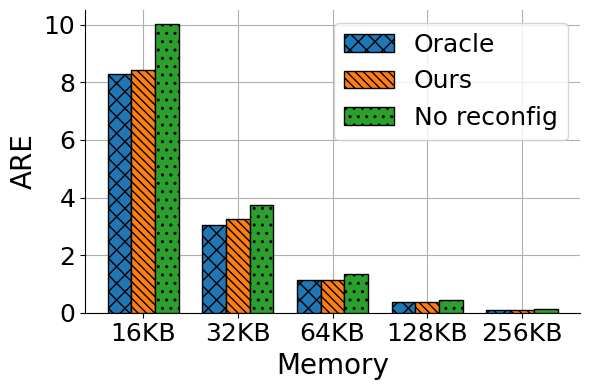

In [26]:
def plot_hh_overall(width=[1024, 2048, 4096, 8192, 16384], fs=[20,18,18]):
    AREs = read_performance_result('hh_output.csv')
            
    # plot 
    oracle_means = [AREs[w][0] for w in width]
    ours_means = [AREs[w][1] for w in width]
    unchange_means = [AREs[w][2] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)


    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('ARE', fontsize=fs[0])
    # ax.set_title('ARE by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2])

    fig.tight_layout()

    plt.show()        
    
    return
plot_hh_overall()

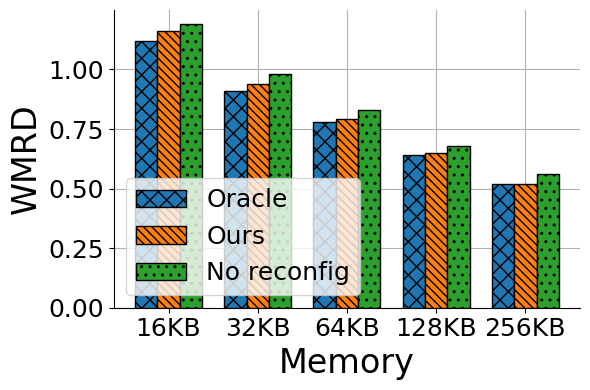

In [27]:
def plot_fsd_overall(width=[1024, 2048, 4096, 8192, 16384], fs=[24,18,18]):
    WMRDs = read_performance_result('fsd_output.csv')
            
    # plot 
    oracle_means = [WMRDs[w][0] for w in width]
    ours_means = [WMRDs[w][1] for w in width]
    unchange_means = [WMRDs[w][2] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)

    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('WMRD', fontsize=fs[0])
    # ax.set_title('WMRD by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2], loc='lower left')

    fig.tight_layout()

    plt.show()        
    
    return
plot_fsd_overall()

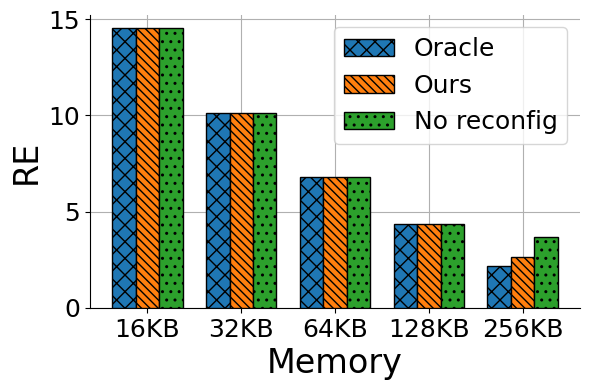

In [28]:
def plot_ent_overall(width=[1024, 2048, 4096, 8192, 16384], fs=[24,18,18]):
    REs = read_performance_result('ent_output.csv')
            
    # plot 
    oracle_means = [REs[w][0] for w in width]
    ours_means = [REs[w][1] for w in width]
    unchange_means = [REs[w][2] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)

    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('RE', fontsize=fs[0])
    # ax.set_title('RE by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2])

    fig.tight_layout()

    plt.show()        
    
    return
plot_ent_overall()